# Analysis of memory Container vs Non-container

In [7]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

# Prepare dataframes

In [50]:
CONTAINER_FILE = "benchmark-lpg-test.2024-03-26_09-27-26.results.lpg.BlocksWorld.csv"
NONCONTAINER_FILE = "benchmark-lpg-test.nocon.2024-03-26_09-49-23.results.lpg.BlocksWorld.csv"


CONTAINER_FILE = "/home/ssardina/PROJECTS/planning/APP/app.git/results/benchmark-lpg-test.con04.2024-03-26_13-36-21.results.lpg.BlocksWorld.csv"
NONCONTAINER_FILE = "/home/ssardina/PROJECTS/planning/APP/app.git/results/benchmark-lpg-test.ncon04.2024-03-26_13-28-00.results.lpg.BlocksWorld.csv"


# CONTAINER_FILE = os.path.join("..", "results", CONTAINER_FILE)
# NONCONTAINER_FILE = os.path.join("..", "results", NONCONTAINER_FILE)

for f in [CONTAINER_FILE, NONCONTAINER_FILE]:
    if not os.path.exists(f):
        print(f"File {f} not found")
        exit(1) 

In [52]:
renaming_col = {"benchmarks/benchexe/tasks/" : "task", "cputime (s)": "cputime", "walltime (s)": "walltime ", "memory (MB)" : "mem"}


container_df = pd.read_csv(CONTAINER_FILE, delimiter="\t", skiprows=2)
noncontainer_df = pd.read_csv(NONCONTAINER_FILE, delimiter="\t", skiprows=2)


container_df.rename(columns=renaming_col, inplace=True)
noncontainer_df.rename(columns=renaming_col, inplace=True)

In [53]:
container_df.head()

,task,status,cputime,walltime,mem,policy_size,solve_time,translation_time
0,AIJ_BlocksWorld_LIN10-110_40.yml,True,91.433224,91.573981,313.409536,113,91.327598,0.145435


We combine both:

* `_c`: data for container
* `_nc`: data for non-container

In [68]:
df = container_df.merge(noncontainer_df, how="left", left_on = "task", right_on = "task", suffixes=("_c", "_nc"))

df['cpu_diff'] = df['cputime_c'] - df['cputime_nc']
df['mem_diff'] = df['mem_c'] - df['mem_nc']
df['policy_diff'] = df['policy_size_c'] - df['policy_size_nc']

df['cpu_ratio'] = df['cputime_c'] / df['cputime_nc']
df['mem_ratio'] = df['mem_c'] / df['mem_nc']
df['policy_ratio'] = df['policy_size_c'] / df['policy_size_nc']



df.head()

,task,status_c,cputime_c,walltime _c,mem_c,policy_size_c,solve_time_c,translation_time_c,status_nc,cputime_nc,...,mem_nc,policy_size_nc,solve_time_nc,translation_time_nc,cpu_diff,mem_diff,policy_diff,cpu_ratio,mem_ratio,policy_ratio
0,AIJ_BlocksWorld_LIN10-110_40.yml,True,91.433224,91.573981,313.409536,113,91.327598,0.145435,True,91.484602,...,314.322944,113,91.453094,0.147632,-0.051378,-0.913408,0,0.999438,0.997094,1.0


# Analysis of difference container vs non-container

We would expect `mem_diff > 0` and `mem_ratio > 1` as the container should use MORE memory due to the writes in the RAM disk

In [73]:
df[['task', 'mem_c', 'mem_nc', 'mem_diff', 'mem_ratio']]

,task,mem_c,mem_nc,mem_diff,mem_ratio
0,AIJ_BlocksWorld_LIN10-110_40.yml,313.409536,314.322944,-0.913408,0.997094


Text(0.5, 1.0, 'container - noncontainer')

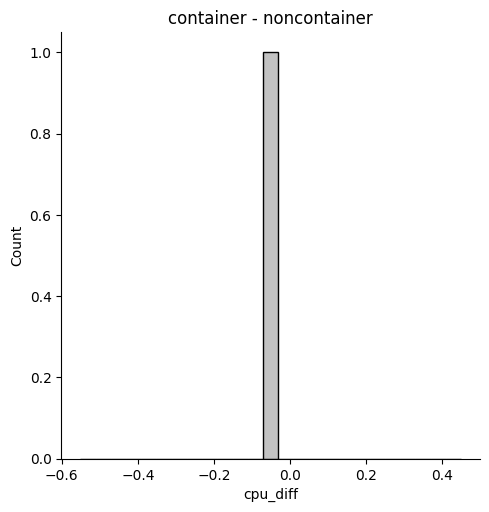

In [72]:
sns.displot(df, x="cpu_diff", bins=25, color="#aeaeae")
plt.title("container - noncontainer")

Text(0.5, 1.0, 'container / noncontainer')

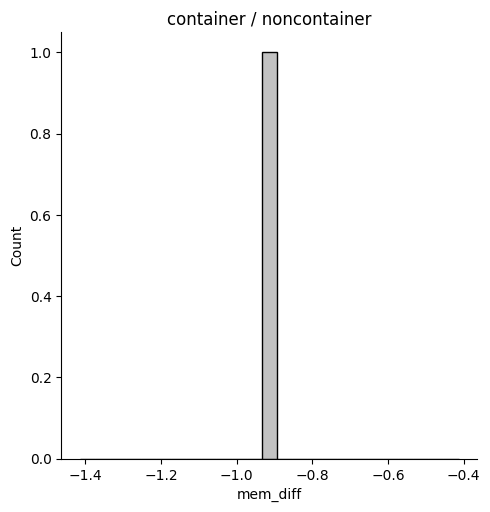

In [71]:
sns.displot(df, x="mem_diff", bins=25, color="#aeaeae")
plt.title("container - noncontainer")